In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
members = pd.read_csv("unique_members.csv")
detail_mem = pd.read_csv("memberdetails.csv")

In [19]:
members.head()

,bioguideId,district,partyName,state,chamber,startYear,endYear,name
0,L000604,4.0,Republican,Colorado,House of Representatives,2024,0,"Lopez, Greg"
1,G000579,8.0,Republican,Wisconsin,House of Representatives,2017,2024,"Gallagher, Mike"
2,B001297,4.0,Republican,Colorado,House of Representatives,2015,2024,"Buck, Ken"
3,P000604,10.0,Democratic,New Jersey,House of Representatives,2012,2024,"Payne, Donald M."
4,R000354,2.0,Republican,Arkansas,House of Representatives,1985,1991,"Robinson, Tommy F."


In [20]:
detail_mem.head()

,bioguideId,invertedOrderName,currentMember,terms,startYear,birthYear,sponsoredLegislation,cosponsoredLegislation
0,L000604,"Lopez, Greg",True,1,2024,1964,NaN,12
1,G000579,"Gallagher, Mike",False,4,2017,1984,171.0,885
2,B001297,"Buck, Ken",False,5,2015,1959,123.0,801
3,P000604,"Payne, Donald M.",False,7,2012,1958,123.0,2946
4,C000537,"Clyburn, James E.",True,16,1993,1940,118.0,2706


In [21]:
# join the two csv
fullmembers = members.merge(detail_mem, how="left", on="bioguideId")

In [22]:
#cleanup of the data to drop n/a
fullmembers["district"] = fullmembers["district"].fillna(0)
fullmembers["sponsoredLegislation"] = fullmembers["sponsoredLegislation"].fillna(0)
fullmembers["cosponsoredLegislation"] = fullmembers["cosponsoredLegislation"].fillna(0)





In [23]:
fullmembers

,bioguideId,district,partyName,state,chamber,startYear_x,endYear,name,invertedOrderName,currentMember,terms,startYear_y,birthYear,sponsoredLegislation,cosponsoredLegislation
0,L000604,4.0,Republican,Colorado,House of Representatives,2024,0,"Lopez, Greg","Lopez, Greg",True,1.0,2024.0,1964.0,0.0,12.0
1,G000579,8.0,Republican,Wisconsin,House of Representatives,2017,2024,"Gallagher, Mike","Gallagher, Mike",False,4.0,2017.0,1984.0,171.0,885.0
2,B001297,4.0,Republican,Colorado,House of Representatives,2015,2024,"Buck, Ken","Buck, Ken",False,5.0,2015.0,1959.0,123.0,801.0
3,P000604,10.0,Democratic,New Jersey,House of Representatives,2012,2024,"Payne, Donald M.","Payne, Donald M.",False,7.0,2012.0,1958.0,123.0,2946.0
4,R000354,2.0,Republican,Arkansas,House of Representatives,1985,1991,"Robinson, Tommy F.",NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,F000229,6.0,Democratic,Georgia,House of Representatives,1953,1979,"Flynt, John J., Jr.",NaN,NaN,NaN,NaN,NaN,0.0,0.0
2518,F000218,7.0,Democratic,Alabama,House of Representatives,1969,1979,"Flowers, Walter",NaN,NaN,NaN,NaN,NaN,0.0,0.0
2519,F000215,1.0,Democratic,New Jersey,House of Representatives,1975,1991,"Florio, James J.",NaN,NaN,NaN,NaN,NaN,0.0,0.0
2520,F000209,11.0,Democratic,Pennsylvania,House of Representatives,1955,1981,"Flood, Daniel J.",NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [24]:
fullmembers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bioguideId              2522 non-null   object 
 1   district                2522 non-null   float64
 2   partyName               2522 non-null   object 
 3   state                   2522 non-null   object 
 4   chamber                 2522 non-null   object 
 5   startYear_x             2522 non-null   int64  
 6   endYear                 2522 non-null   int64  
 7   name                    2522 non-null   object 
 8   invertedOrderName       1483 non-null   object 
 9   currentMember           1483 non-null   object 
 10  terms                   1483 non-null   float64
 11  startYear_y             1483 non-null   float64
 12  birthYear               1483 non-null   float64
 13  sponsoredLegislation    2522 non-null   float64
 14  cosponsoredLegislation  2522 non-null   

In [25]:
# cleanup of datatypes

fullmembers = fullmembers.dropna(how="all")
fullmembers = fullmembers.dropna(subset="currentMember")
fullmembers = fullmembers.drop(columns=["invertedOrderName"])
fullmembers = fullmembers.rename(columns={"startYear_x":"startYear"})
fullmembers["district"] = fullmembers["district"].astype(int)
fullmembers["sponsoredLegislation"] = fullmembers["sponsoredLegislation"].astype(int)
fullmembers["cosponsoredLegislation"] = fullmembers["cosponsoredLegislation"].astype(int)
fullmembers["partyName"] = fullmembers["partyName"].astype("category")
fullmembers["chamber"] = fullmembers["chamber"].astype("category")
fullmembers["state"] = fullmembers["state"].astype("category")
fullmembers["terms"] = fullmembers["terms"].astype("int")
fullmembers["startYear_y"] = fullmembers["startYear_y"].astype("int")
fullmembers["birthYear"] = fullmembers["birthYear"].astype("int")
fullmembers["currentMember"] = fullmembers["currentMember"].astype(bool)


In [26]:
fullmembers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1483 entries, 0 to 2515
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bioguideId              1483 non-null   object  
 1   district                1483 non-null   int64   
 2   partyName               1483 non-null   category
 3   state                   1483 non-null   category
 4   chamber                 1483 non-null   category
 5   startYear               1483 non-null   int64   
 6   endYear                 1483 non-null   int64   
 7   name                    1483 non-null   object  
 8   currentMember           1483 non-null   bool    
 9   terms                   1483 non-null   int64   
 10  startYear_y             1483 non-null   int64   
 11  birthYear               1483 non-null   int64   
 12  sponsoredLegislation    1483 non-null   int64   
 13  cosponsoredLegislation  1483 non-null   int64   
dtypes: bool(1), category(3), int6

In [27]:
fullmembers


,bioguideId,district,partyName,state,chamber,startYear,endYear,name,currentMember,terms,startYear_y,birthYear,sponsoredLegislation,cosponsoredLegislation
0,L000604,4,Republican,Colorado,House of Representatives,2024,0,"Lopez, Greg",True,1,2024,1964,0,12
1,G000579,8,Republican,Wisconsin,House of Representatives,2017,2024,"Gallagher, Mike",False,4,2017,1984,171,885
2,B001297,4,Republican,Colorado,House of Representatives,2015,2024,"Buck, Ken",False,5,2015,1959,123,801
3,P000604,10,Democratic,New Jersey,House of Representatives,2012,2024,"Payne, Donald M.",False,7,2012,1958,123,2946
5,C000537,6,Democratic,South Carolina,House of Representatives,1993,0,"Clyburn, James E.",True,16,1993,1940,118,2706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,F000349,7,Republican,New Jersey,House of Representatives,1993,2001,"Franks, Bob",False,4,1993,1951,118,852
2504,F000339,4,Democratic,Massachusetts,House of Representatives,1981,2013,"Frank, Barney",False,16,1981,1940,797,10258
2507,F000328,4,Republican,Florida,House of Representatives,1993,2001,"Fowler, Tillie",False,4,1993,1942,47,852
2513,F000257,1,Democratic,New York,House of Representatives,1995,2001,"Forbes, Michael P.",False,3,1995,1952,52,859


In [28]:
fullmembers = fullmembers.drop(columns="startYear_y")

In [29]:
fullmembers.head()

,bioguideId,district,partyName,state,chamber,startYear,endYear,name,currentMember,terms,birthYear,sponsoredLegislation,cosponsoredLegislation
0,L000604,4,Republican,Colorado,House of Representatives,2024,0,"Lopez, Greg",True,1,1964,0,12
1,G000579,8,Republican,Wisconsin,House of Representatives,2017,2024,"Gallagher, Mike",False,4,1984,171,885
2,B001297,4,Republican,Colorado,House of Representatives,2015,2024,"Buck, Ken",False,5,1959,123,801
3,P000604,10,Democratic,New Jersey,House of Representatives,2012,2024,"Payne, Donald M.",False,7,1958,123,2946
5,C000537,6,Democratic,South Carolina,House of Representatives,1993,0,"Clyburn, James E.",True,16,1940,118,2706


In [30]:
state_mem = fullmembers.groupby("state", observed=True)

<Axes: xlabel='state'>

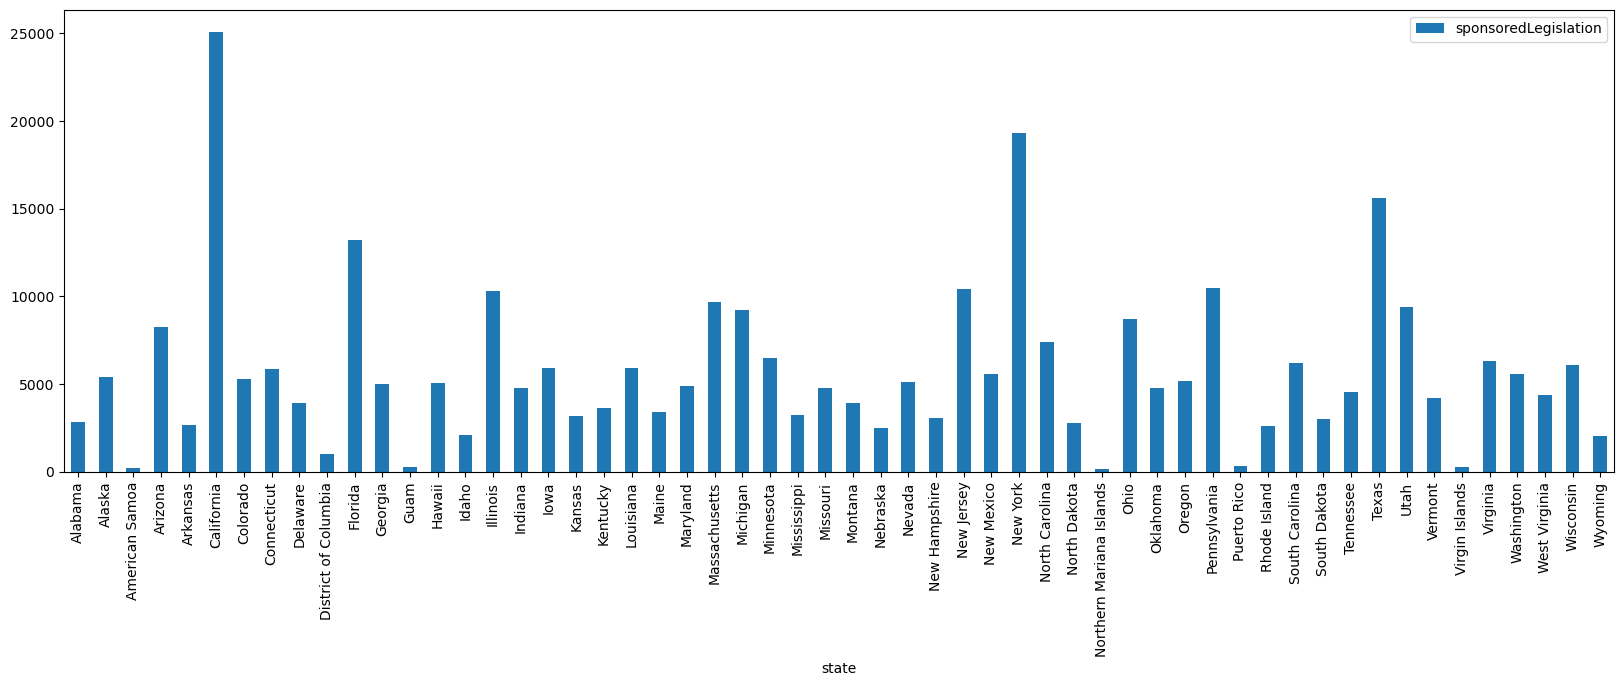

In [63]:
state_mem.agg({"sponsoredLegislation":"sum","cosponsoredLegislation":"sum" }).plot(y="sponsoredLegislation", kind="bar",width=0.5,figsize=(20,6))
#sponsored_by_state = state_mem.agg({"sponsoredLegislation":"sum"})
#sponsored_by_state.plot(kind="bar",width=0.5,figsize=(20,6))

<Axes: xlabel='state'>

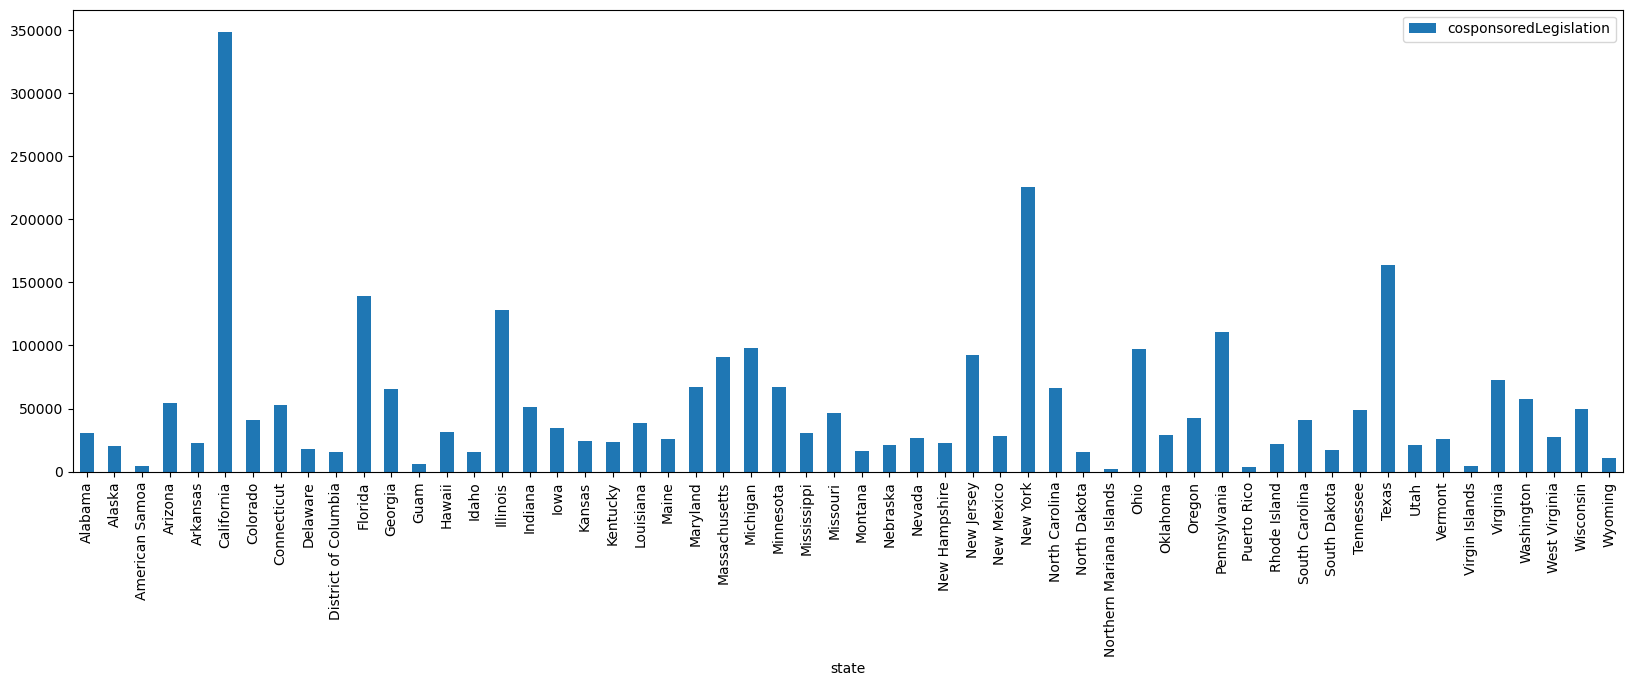

In [64]:
state_mem.agg({"sponsoredLegislation":"sum","cosponsoredLegislation":"sum" }).plot(y="cosponsoredLegislation", kind="bar",width=0.5,figsize=(20,6))
